## Week 4-2: Support Vector Machine

#### Last time
* Logistic regression
* LDA and QDA
* High dimensional logistic regression

#### Today
* Confusion matrix and metrics
* ROC curve
* Support Vector Machine

#### Reference
- James Sharpnack's lecture notes
- Ch 12 of ESL
- Corinna Cortes and Vladimir Vapnik (1995). Support-Vector Networks. Machine Learning, 20:273--297.
- Pragya Sur and Emmanuel Candès (2019). A modern maximum-likelihood theory for high-dimensional logistic regression. PNAS, 116:14516--14525
- Boyd and Vandenberghe. https://web.stanford.edu/~boyd/cvxbook/
- How to plot svm linear margin: https://medium.com/geekculture/svm-classification-with-sklearn-svm-svc-how-to-plot-a-decision-boundary-with-margins-in-2d-space-7232cb3962c0

### An interesting phenomenon on logistic regression (Sur and Candès, 2019)

A simulation:

The classical theory assumes $p \ll n$, as $n \to \infty$. What if $p$ is not vanishingly small compared with $n$?

Say $n = 4,000$ and $p = 800$, 


<img width="500px" src="bias-logistic.png"> 




### Confusion matrix and metrics

<table style='font-family:"Courier New", Courier, monospace; font-size:120%'>
    <tr><td></td><td>Pred 1</td><td>Pred -1</td></tr>
    <tr><td>True 1</td><td>True Pos</td><td>False Neg</td></tr>
    <tr><td>True -1</td><td>False Pos</td><td>True Neg</td></tr>
</table>

$$
\textrm{FPR} = \frac{FP}{FP+TN}
$$
$$
\textrm{TPR, Recall} = \frac{TP}{TP + FN}
$$
$$
\textrm{Precision} = \frac{TP}{TP + FP}
$$

In [21]:
plt.style.use('ggplot')

In [22]:
score_lr = X_te @ lr.coef_[0,:]
fpr_lr, tpr_lr, threshs = metrics.roc_curve(y_te,score_lr)
prec_lr, rec_lr, threshs = metrics.precision_recall_curve(y_te,score_lr)

_ROC curve_: (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. 

Lowering the classification threshold classifies more items as positive, thus increasing both False Positives and True Positives. 

The area under the ROC curve is known as _AUC_ (area under the ROC Curve), which measures the entire two-dimensional area underneath the entire ROC curve.

Text(0.5, 1.0, "ROC for 'duration'")

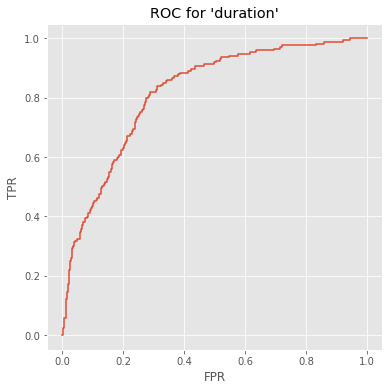

In [23]:
plt.figure(figsize=(6,6))
plt.plot(fpr_lr,tpr_lr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("ROC for 'duration'")

From [Wiki](https://en.wikipedia.org/wiki/Receiver_operating_characteristic)

<img width="500px" src="roc_curve.png"> 

### Support vector classifier

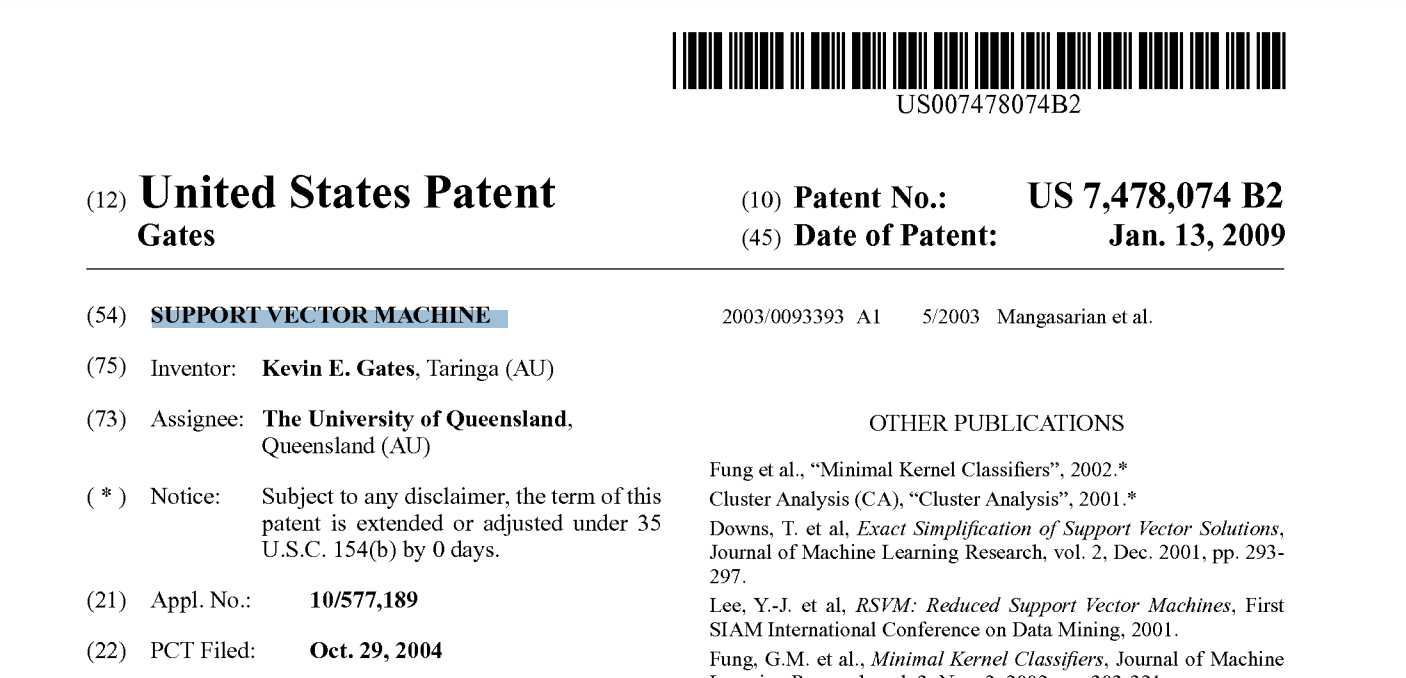


#### Linear classifier - Hard and soft margin

See notes

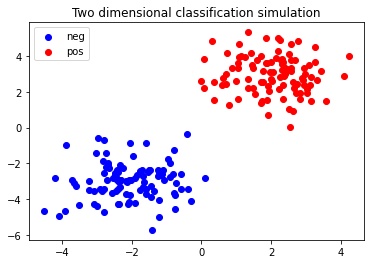

In [14]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(2022)


def lm_sim(N = 100):
    """simulate a binary response and two predictors"""
    X1 = (np.random.randn(N*2)).reshape((N,2)) + np.array([2,3])
    X0 = (np.random.randn(N*2)).reshape((N,2)) + np.array([-2,-3])
    y = - np.ones(N*2)
    y[:N]=1
    X = np.vstack((X1,X0))
    return X, y, X0, X1

X_sim,y_sim,X0,X1 = lm_sim()

plt.scatter(X0[:,0],X0[:,1],c='b',label='neg')
plt.scatter(X1[:,0],X1[:,1],c='r',label='pos')
plt.title("Two dimensional classification simulation")
_ = plt.legend(loc=2)

In [15]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X_sim, y_sim)

SVC(kernel='linear')

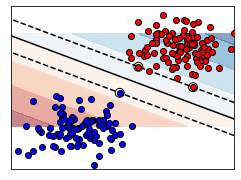

In [40]:
# revised from https://scikit-learn.org/stable/auto_examples/svm/plot_svm_margin.html

from matplotlib import cm

# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors (margin away from hyperplane in direction
# perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
# 2-d.
margin = 1 / np.sqrt(np.sum(clf.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k--")
plt.plot(xx, yy_up, "k--")

plt.scatter(
    clf.support_vectors_[:, 0],
    clf.support_vectors_[:, 1],
    s=80,
    facecolors="none",
    zorder=10,
    edgecolors="k",
    cmap=cm.get_cmap("RdBu"),
)
plt.scatter(
    X0[:,0], X0[:,1], c='b', zorder=10, cmap=cm.get_cmap("RdBu"), edgecolors="k"
)

plt.scatter(
    X1[:,0], X1[:,1], c='r', zorder=10, cmap=cm.get_cmap("RdBu"), edgecolors="k"
)

plt.axis("tight")
x_min = -4.8
x_max = 4.2
y_min = -6
y_max = 6

YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

    # Put the result into a contour plot
plt.contourf(XX, YY, Z, cmap=cm.get_cmap("RdBu"), alpha=0.5, linestyles=["-"])

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())

plt.show()

In [44]:
y_pred = clf.predict(X_sim)
y_pred

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
       -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1., -1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1., -1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1.,
       -1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1., -1.,  1.,
       -1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1.,  1.,  1.,  1

#### Example from Week 4-1

In [46]:
np.random.seed(200)

def lm_sim(N = 100):
    """simulate a binary response and two predictors"""
    X1 = (np.random.randn(N*2)).reshape((N,2)) + np.array([2,3])
    X0 = (np.random.randn(N*2)).reshape((N,2)) + np.array([.5,1.5])
    y = - np.ones(N*2)
    y[:N]=1
    X = np.vstack((X1,X0))
    return X, y, X0, X1

In [47]:
X_sim,y_sim,X0,X1 = lm_sim()

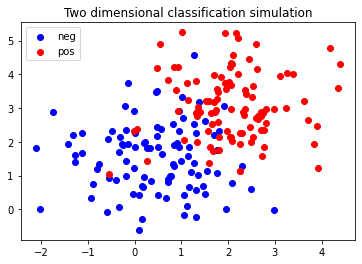

In [48]:
plt.scatter(X0[:,0],X0[:,1],c='b',label='neg')
plt.scatter(X1[:,0],X1[:,1],c='r',label='pos')
plt.title("Two dimensional classification simulation")
_ = plt.legend(loc=2)

In [49]:
from sklearn import svm

clfo = svm.SVC(kernel='linear')
clfo.fit(X_sim, y_sim)

SVC(kernel='linear')

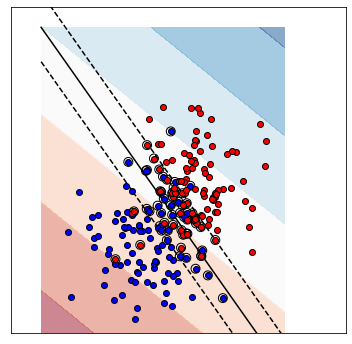

In [79]:
from matplotlib import cm

# get the separating hyperplane
w = clfo.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-3, 5)
yy = a * xx - (clfo.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors (margin away from hyperplane in direction
# perpendicular to hyperplane). This is sqrt(1+a^2) away vertically in
# 2-d.
margin = 1 / np.sqrt(np.sum(clfo.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

    # plot the line, the points, and the nearest vectors to the plane
plt.figure(1, figsize=(6, 6))
plt.clf()
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k--")
plt.plot(xx, yy_up, "k--")

plt.scatter(
    clfo.support_vectors_[:, 0],
    clfo.support_vectors_[:, 1],
    s=80,
    facecolors="none",
    zorder=10,
    edgecolors="k",
    cmap=cm.get_cmap("RdBu"),
)
plt.scatter(
    X0[:,0], X0[:,1], c='b', zorder=10, cmap=cm.get_cmap("RdBu"), edgecolors="k"
)

plt.scatter(
    X1[:,0], X1[:,1], c='r', zorder=10, cmap=cm.get_cmap("RdBu"), edgecolors="k"
)

plt.axis("tight")
x_min = -4
x_max = 7
y_min = -1
y_max = 8

YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

    # Put the result into a contour plot
plt.contourf(XX, YY, Z, cmap=cm.get_cmap("RdBu"), alpha=0.5, linestyles=["-"])

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())

plt.show()

In [72]:
clfo.intercept_

array([-4.07596093])

In [74]:
yy

array([ 9.82628914,  9.58314552,  9.3400019 ,  9.09685828,  8.85371466,
        8.61057104,  8.36742741,  8.12428379,  7.88114017,  7.63799655,
        7.39485293,  7.15170931,  6.90856569,  6.66542207,  6.42227845,
        6.17913482,  5.9359912 ,  5.69284758,  5.44970396,  5.20656034,
        4.96341672,  4.7202731 ,  4.47712948,  4.23398586,  3.99084224,
        3.74769861,  3.50455499,  3.26141137,  3.01826775,  2.77512413,
        2.53198051,  2.28883689,  2.04569327,  1.80254965,  1.55940602,
        1.3162624 ,  1.07311878,  0.82997516,  0.58683154,  0.34368792,
        0.1005443 , -0.14259932, -0.38574294, -0.62888657, -0.87203019,
       -1.11517381, -1.35831743, -1.60146105, -1.84460467, -2.08774829])

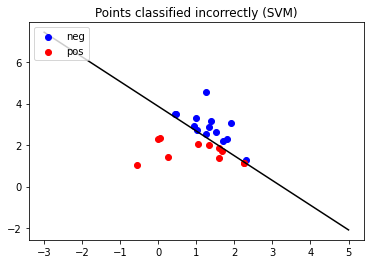

In [81]:
# svm prediction error
y_pred_svm = clfo.predict(X_sim)

N = 100
plt.scatter(X0[y_pred_svm[N:] == 1,0],X0[y_pred_svm[N:] == 1,1],c='b',label='neg')
plt.scatter(X1[y_pred_svm[:N] == -1,0],X1[y_pred_svm[:N] == -1,1],c='r',label='pos')
plt.plot(xx,yy,c='k')
plt.title("Points classified incorrectly (SVM)")
_ = plt.legend(loc=2)

In [88]:
np.count_nonzero(y_pred_svm - y_sim)

25

Comparing to the logistic regression and LDA

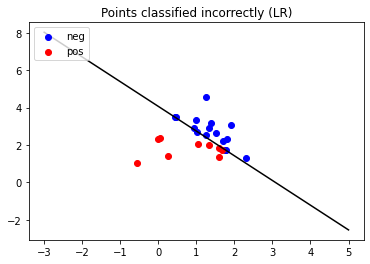

In [86]:
from sklearn import linear_model

lr_sim = linear_model.LogisticRegression()
lr_sim.fit(X_sim,y_sim)

N = 100
beta1 = lr_sim.coef_[0,0]
beta2 = lr_sim.coef_[0,1]
beta0 = lr_sim.intercept_
xx = np.linspace(-3,5, 100)
x2hat = -(beta0 + beta1*xx) / beta2
lr_pred = lr_sim.predict(X_sim)
plt.scatter(X0[lr_pred[N:] == 1,0],X0[lr_pred[N:] == 1,1],c='b',label='neg')
plt.scatter(X1[lr_pred[:N] == -1,0],X1[lr_pred[:N] == -1,1],c='r',label='pos')
plt.plot(T,x2hat,c='k')
plt.title("Points classified incorrectly (LR)")
_ = plt.legend(loc=2)

In [87]:
np.count_nonzero(lr_pred - y_sim)

25

In [89]:
# LDA model

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
y_lda = lda.fit(X_sim, y_sim).predict(X_sim)

np.count_nonzero(y_lda - y_sim)

28

#### SVM with Kernels

In [102]:
# using the radial basis kernel

clfk = svm.SVC(kernel="rbf")
clfk.fit(X_sim, y_sim)

SVC()

In [115]:
nonlinear_svm = clfk.predict(X_sim)
np.count_nonzero(nonlinear_svm - y_sim)

24

From Ch 12 of ESL

<img width="800px" src="svm-linear.png"> 

<img width="800px" src="svm-nonlinear.png"> 